In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_prcp_val = session.query(Measurement).first()
date_prcp_val.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x122b57690>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [14]:
prcp_data = session.query(Measurement).filter(Measurement.date > "2016-08-19")
prcp_data

prcp_list = []
months_list = []
    
for prcp in prcp_data:
    prcp_list.append(prcp.prcp)
    months_list.append(prcp.date)

plt.plot(months_list, prcp_list)
plt.show()

In [15]:
# Calculate the date 1 year ago from the last data point in the database
from sqlalchemy import distinct
month_data_dist = session.query(distinct(Measurement.date)).order_by(Measurement.date.desc()).limit(365)
month_data_dist

In [16]:
month_list_all = []

for month in month_data_dist:
    month_list_all.append(month[0])
    
month_list_all

['2017-08-23',
 '2017-08-22',
 '2017-08-21',
 '2017-08-20',
 '2017-08-19',
 '2017-08-18',
 '2017-08-17',
 '2017-08-16',
 '2017-08-15',
 '2017-08-14',
 '2017-08-13',
 '2017-08-12',
 '2017-08-11',
 '2017-08-10',
 '2017-08-09',
 '2017-08-08',
 '2017-08-07',
 '2017-08-06',
 '2017-08-05',
 '2017-08-04',
 '2017-08-03',
 '2017-08-02',
 '2017-08-01',
 '2017-07-31',
 '2017-07-30',
 '2017-07-29',
 '2017-07-28',
 '2017-07-27',
 '2017-07-26',
 '2017-07-25',
 '2017-07-24',
 '2017-07-23',
 '2017-07-22',
 '2017-07-21',
 '2017-07-20',
 '2017-07-19',
 '2017-07-18',
 '2017-07-17',
 '2017-07-16',
 '2017-07-15',
 '2017-07-14',
 '2017-07-13',
 '2017-07-12',
 '2017-07-11',
 '2017-07-10',
 '2017-07-09',
 '2017-07-08',
 '2017-07-07',
 '2017-07-06',
 '2017-07-05',
 '2017-07-04',
 '2017-07-03',
 '2017-07-02',
 '2017-07-01',
 '2017-06-30',
 '2017-06-29',
 '2017-06-28',
 '2017-06-27',
 '2017-06-26',
 '2017-06-25',
 '2017-06-24',
 '2017-06-23',
 '2017-06-22',
 '2017-06-21',
 '2017-06-20',
 '2017-06-19',
 '2017-06-

In [17]:
# Perform a query to retrieve the data and precipitation scores
prcp_data_val = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
prcp_data_val

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [18]:
#only date/measurement retrieval
session.query(Measurement.date, func.avg(Measurement.prcp)).\
            group_by(Measurement.date).order_by(Measurement.date.desc()).all()

[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [19]:
#query avg precipitation
prcp_avg = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            group_by(Measurement.date).order_by(Measurement.date.desc()).limit(365)

In [20]:
avg_months_list=[]
avg_prcp_list=[]

for x in prcp_avg:
    avg_months_list.append(x[0])
    avg_prcp_list.append(x[1])

plt.plot(avg_months_list, avg_prcp_list)
plt.show()

In [21]:
prcp_all_date = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
prcp_all_date

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [22]:
#looping dates
dates_list=[]
prcp_list_1=[]

for x in prcp_all_date:
    dates_list.append(x[2])
    prcp_list_1.append(x[3])
    if x[2] == '2016-08-19':
        break
        
dates_list[-1]

'2016-08-19'

In [23]:
#reversing date order
for i in reversed(dates_list):
    dates_list_reverse = list(reversed(dates_list))
    
dates_list_reverse

['2016-08-19',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-30',
 '2016-08-

In [24]:
for i in reversed(prcp_list_1):
    prcp_list_2 = list(reversed(prcp_list_1))
    
prcp_list_2

[0.04,
 0.2,
 0.13,
 0.0,
 0.0,
 0.03,
 0.0,
 1.08,
 0.08,
 0.41,
 0.32,
 0.12,
 1.2,
 2.32,
 0.4,
 None,
 None,
 0.94,
 0.4,
 0.7,
 1.79,
 0.02,
 None,
 0.05,
 0.15,
 0.0,
 1.45,
 2.15,
 1.22,
 None,
 2.28,
 2.15,
 0.08,
 0.11,
 0.06,
 0.21,
 0.0,
 0.0,
 0.08,
 0.08,
 0.01,
 0.0,
 0.04,
 0.02,
 0.03,
 0.0,
 None,
 0.12,
 0.0,
 0.02,
 0.18,
 0.0,
 2.07,
 0.6,
 0.14,
 0.14,
 0.14,
 0.01,
 0.9,
 0.35,
 0.0,
 None,
 0.04,
 0.17,
 0.0,
 0.05,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 2.46,
 0.24,
 0.25,
 None,
 None,
 0.1,
 0.13,
 0.01,
 0.02,
 None,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 None,
 None,
 0.19,
 0.02,
 0.0,
 1.0,
 0.12,
 0.08,
 0.07,
 0.0,
 0.44,
 0.14,
 0.74,
 0.03,
 0.03,
 0.18,
 0.03,
 0.02,
 None,
 0.11,
 None,
 1.0,
 0.11,
 0.03,
 0.04,
 0.05,
 None,
 1.35,
 0.16,
 0.11,
 0.23,
 0.1,
 0.05,
 0.15,
 0.07,
 0.01,
 None,
 0.01,
 0.22,
 0.0,
 0.35,
 0.16,
 0.23,
 None,
 0.29,
 0.01,
 0.03,
 1.16,
 0.09,
 0.14,
 0.01,
 0.0,
 0.6,
 0.3,
 0.12,
 0.18,
 0.05,
 1.04,
 0.31,
 0.15,
 None,
 None,


plt.plot(dates_list_reverse, prcp_list_2)
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates = pd.DataFrame(dates_list_reverse)
df_prcp = pd.DataFrame(prcp_list_2)

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_dates_fixed = df_dates.reset_index()
df_dates_fixed.head()

,index,0
0,0,2016-08-19
1,1,2016-08-20
2,2,2016-08-20
3,3,2016-08-20
4,4,2016-08-20


In [27]:
df_prcp_fixed = df_prcp.reset_index()
df_prcp_fixed.head()

,index,0
0,0,0.04
1,1,0.20
2,2,0.13
3,3,0.00
4,4,0.00


In [28]:
# Sort the dataframe by date

merged_prcp_date_df = pd.merge(df_dates_fixed, df_prcp_fixed, on='index')
merged_prcp_date_df.head()

,index,0_x,0_y
0,0,2016-08-19,0.04
1,1,2016-08-20,0.20
2,2,2016-08-20,0.13
3,3,2016-08-20,0.00
4,4,2016-08-20,0.00


In [29]:
#drop columns
merged_prcp_date_df.drop(columns=['index'], inplace=True)
merged_prcp_date_df.head()

,0_x,0_y
0,2016-08-19,0.04
1,2016-08-20,0.20
2,2016-08-20,0.13
3,2016-08-20,0.00
4,2016-08-20,0.00


In [30]:
#connect database
connect = engine.connect()
first_ten_prcp  = pd.read_sql_query('SELECT date, prcp FROM Measurement', connect)
first_ten_prcp.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [31]:
#final merged precipitation/date dataframe
final_df = merged_prcp_date_df.rename(columns={"0_x": "Date", "0_y": "Precipitation"})
final_date_index = final_df.set_index("Date")
final_date_index.head()

,Precipitation
Date,
2016-08-19,0.04
2016-08-20,0.20
2016-08-20,0.13
2016-08-20,0.00
2016-08-20,0.00


In [32]:
#sort dataframe
final_date_index.dropna(inplace=True)
final_date_index.sort_index().head()

,Precipitation
Date,
2016-08-19,0.04
2016-08-20,0.20
2016-08-20,0.13
2016-08-20,0.00
2016-08-20,0.00


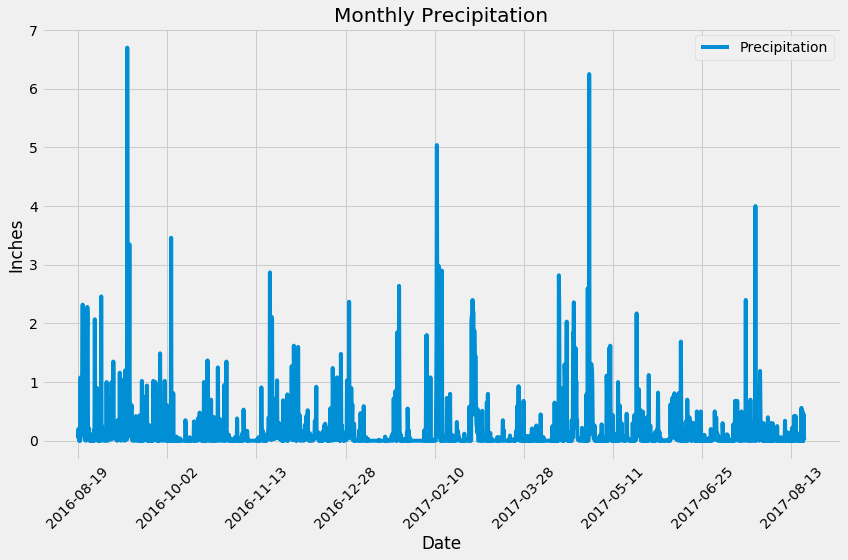

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
final_date_index.plot(title="Monthly Precipitation", figsize=(12,8), rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
merged_prcp_date_df.describe()

,0_y
count,2038.000000
mean,0.179563
std,0.463171
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).distinct(Station.station).count()
stations

9

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query()

In [37]:
station_count = (session.query(Measurement.station, func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc())
                .all())
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station_data = station_count[0][0]
active_station_data_maxminavg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == active_station_data).all()
active_station_data_maxminavg

[(54.0, 85.0, 71.66378066378067)]

In [39]:
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_1= []

station_temp_high = engine.execute('SELECT * FROM Measurement WHERE station = "USC00519281" ORDER BY date DESC').fetchall()

for x in station_temp_high:
    station_temp_1.append(x[4])
    if x[2] == "2016-08-19":
        break
station_temp_1

[79.0,
 76.0,
 76.0,
 77.0,
 77.0,
 77.0,
 83.0,
 82.0,
 77.0,
 76.0,
 81.0,
 82.0,
 81.0,
 76.0,
 75.0,
 77.0,
 75.0,
 82.0,
 77.0,
 77.0,
 77.0,
 76.0,
 76.0,
 76.0,
 80.0,
 80.0,
 76.0,
 74.0,
 74.0,
 72.0,
 69.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 78.0,
 76.0,
 81.0,
 79.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 71.0,
 77.0,
 72.0,
 72.0,
 74.0,
 72.0,
 72.0,
 75.0,
 79.0,
 73.0,
 75.0,
 74.0,
 76.0,
 74.0,
 74.0,
 74.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 77.0,
 76.0,
 76.0,
 80.0,
 75.0,
 72.0,
 74.0,
 80.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 71.0,
 74.0,
 76.0,
 68.0,
 69.0,
 74.0,
 74.0,
 74.0,
 77.0,
 76.0,
 75.0,
 70.0,
 74.0,
 67.0,
 70.0,
 75.0,
 79.0,
 70.0,
 75.0,
 70.0,
 75.0,
 65.0,
 60.0,
 72.0,
 67.0,
 70.0,
 74.0,
 72.0,
 68.0,
 76.0,
 72.0,
 69.0,
 76.0,
 67.0,
 68.0,
 67.0,
 71.0,
 78.0,
 74.0,
 69.0,
 69.0,
 70.0,
 67.0,
 78.0,
 77.0,
 74.0,
 67.0,
 71.0,
 67.0,
 70.0,
 75.0,
 74.0,
 71.0,
 73.0,
 68.0,
 74.0,
 76.0,
 77.0,
 76.0,
 71.0,
 72.0,
 73.0,
 72.0,
 69.0,

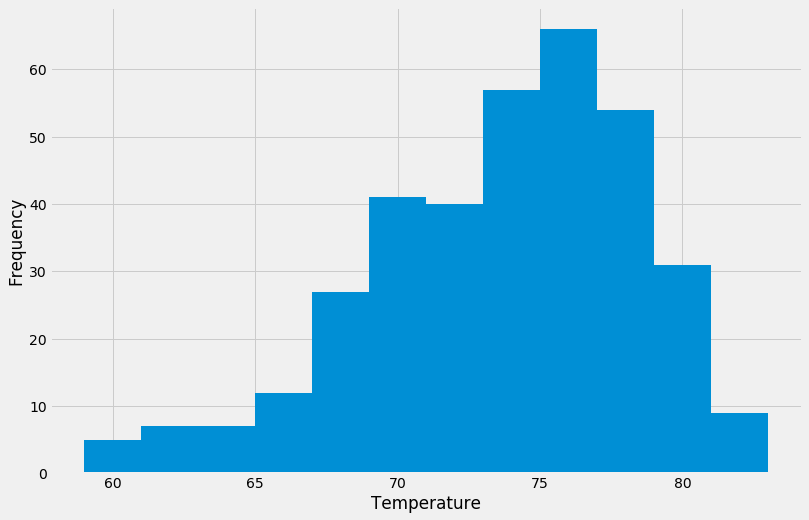

In [41]:
#plotting histogram
plt.figure(figsize=(12,8))
plt.hist(station_temp_1, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


## Bonus Challenge Assignment

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temperature_val = calc_temps('2016-11-10', '2016-11-20')
print(calc_temps('2016-11-10', '2016-11-20'))

[(67.0, 75.04545454545455, 80.0)]


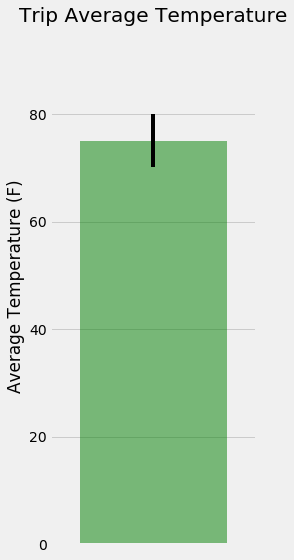

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(4, 8))
y = temperature_val[0][1]
x_pos = 1
error = temperature_val[0][2] - temperature_val[0][1]
bar = ax.bar(x_pos, y, yerr=error, alpha=0.5, color='green', align='center')
ax.set(xticks=range(x_pos), xticklabels="a", title="Trip Average Temperature", ylabel="Average Temperature (F)")
ax.margins(.2, .2)
plt.tight_layout()
plt.show()

In [50]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2016-11-10'
end_date = '2016-11-20'


total_trip_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                                Station.elevation, func.sum(Measurement.prcp)).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                    group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
total_trip_data



[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.01),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.75),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.6200000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.46),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.22999999999999998),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.08),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.02)]

In [51]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def dailynormals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
dailynormals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [52]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates
trip_days_list = pd.date_range(start_date,end_date)
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [53]:
trip_days_list

DatetimeIndex(['2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
               '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
               '2016-11-18', '2016-11-19', '2016-11-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
trip_days_list[2]

Timestamp('2016-11-12 00:00:00', freq='D')

In [55]:
date_time_list = trip_days_list.strftime("%m-%d")
print("date and time:",date_time_list)

date and time: Index(['11-10', '11-11', '11-12', '11-13', '11-14', '11-15', '11-16', '11-17',
       '11-18', '11-19', '11-20'],
      dtype='object')


In [57]:
from datetime import datetime as dt

month_date_list = []

for i in date_time_list:
    month_date = dt.strptime(i, '%m-%d').strftime("%m-%d")
    month_date_list.append(month_date)
    
month_date_list

['11-10',
 '11-11',
 '11-12',
 '11-13',
 '11-14',
 '11-15',
 '11-16',
 '11-17',
 '11-18',
 '11-19',
 '11-20']

In [60]:
normals_data  = []

for i in month_date_list:
    normals_data.append(dailynormals(i)[0])
    
normals_data

[(63.0, 72.47916666666667, 79.0),
 (67.0, 74.3913043478261, 80.0),
 (62.0, 72.78, 80.0),
 (61.0, 72.48979591836735, 79.0),
 (68.0, 74.33333333333333, 80.0),
 (65.0, 73.67924528301887, 79.0),
 (63.0, 73.50980392156863, 79.0),
 (64.0, 72.6923076923077, 79.0),
 (66.0, 73.55319148936171, 81.0),
 (64.0, 73.08333333333333, 81.0),
 (67.0, 73.03921568627452, 80.0)]

In [61]:
temp_min = []
temp_max = []
temp_avg = []

for a in normals_data:
    temp_min.append(a[0])
    temp_max.append(a[1])
    temp_avg.append(a[2])

In [62]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tempdata_df = pd.DataFrame([trip_days_list, temp_min, temp_max, temp_avg]).T
tempdata_df

,0,1,2,3
0,2016-11-10,63,72.4792,79
1,2016-11-11,67,74.3913,80
2,2016-11-12,62,72.78,80
3,2016-11-13,61,72.4898,79
4,2016-11-14,68,74.3333,80
5,2016-11-15,65,73.6792,79
6,2016-11-16,63,73.5098,79
7,2016-11-17,64,72.6923,79
8,2016-11-18,66,73.5532,81
9,2016-11-19,64,73.0833,81


In [63]:
tempdata_df = tempdata_df.rename(columns={0: 'Date', 1: 'Min', 2: 'Max', 3:'Avg'})
tempdata_df

,Date,Min,Max,Avg
0,2016-11-10,63,72.4792,79
1,2016-11-11,67,74.3913,80
2,2016-11-12,62,72.78,80
3,2016-11-13,61,72.4898,79
4,2016-11-14,68,74.3333,80
5,2016-11-15,65,73.6792,79
6,2016-11-16,63,73.5098,79
7,2016-11-17,64,72.6923,79
8,2016-11-18,66,73.5532,81
9,2016-11-19,64,73.0833,81


In [64]:
tempdata_df.set_index('Date', inplace=True)
tempdata_df

,Min,Max,Avg
Date,,,
2016-11-10,63,72.4792,79
2016-11-11,67,74.3913,80
2016-11-12,62,72.78,80
2016-11-13,61,72.4898,79
2016-11-14,68,74.3333,80
2016-11-15,65,73.6792,79
2016-11-16,63,73.5098,79
2016-11-17,64,72.6923,79
2016-11-18,66,73.5532,81


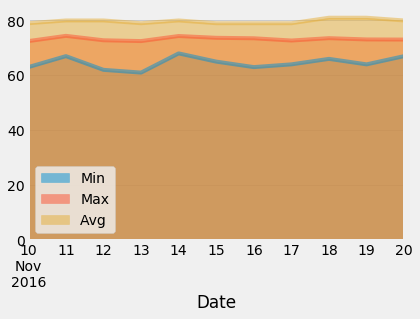

In [65]:
# Plot the daily normals as an area plot with `stacked=False`
tempdata_df.plot(kind='area', stacked=False)
plt.show()